# Karol Peszek - Opracowanie pomiarów z zadania M8
## Zestaw pomiarowy 24

### 1. Cel ćwiczenia
Celem doświadczenia jest zbadanie dynamiki ruchu precesyjnego bąka symetrycznego. W szczególności analizie podlegają:
- Zależność okresu precesji $T_p$ od okresu obrotu tarczy $T$.
- Wpływ masy dodatkowego obciążenia m na częstość precesji
- Wyznaczenie bezwładności obrotowej tarczy $J$ dwiema metodami dynamicznymi i jedną geometryczną

### 2. Podstawy teoretyczne

![](./gyroscope.png)

Żyroskop (bąk symetryczny) to bryła sztywna o symetrii obrotowej. Gdy tarcza obraca się z prędkością kątową $\omega$, jej moment pędu wynosi:
$$L = J\omega$$

Jeżeli na żyroskop działa wewnętrzny moment siły $N$ (pochodzący od ciężarka o masie $m$ na ramieniu $r$), to powoduje on zmianę kierunku wektora momentu pędu:
$$N = \frac{dL}{dt}$$

Moment siły jest prostopadły do wektora $\vec{L}$, zatem żyroskop zaczyna wykonywać ruch precesyjny wokół osi pionowej z prędkością kątową $\omega_p$. Zależność opisuje wzór:
$$N_p = J\omega_p\omega$$

### 3. Model matematyczny
W doświadczeniu wykorzystujemy mierzalne parametry, takie jak okres obrotu tarczy $T$ oraz okres precesji $T_p$. Wykorzystując zależność $\omega = \frac{2\pi}{T}$ oraz $\omega_p = \frac{2\pi}{T_p}$, otrzymamy równanie robocze:
$$mgr = \frac{J \cdot 4\pi^2}{T \cdot T_p}$$

Z powyższego wzoru można wyznaczyć moment bezwładności $J$ poprzez analizę regresji liniowej dla dwóch przypadków:
1. Zmiennej masy $m$: badając zależność $\frac{1}{TT_p} = f(m)$
2. Zmiennej prędkości obrotowej: badając zależność $\frac{1}{T_p} = g(T)$

Dodatkowo moment bezwładności tarczy (traktowanej jako krążek o masie $M_t$ i promieniu $R$) obliczany jest ze wzoru geometrycznego:
$$J = \frac{1}{2} M_t R^2$$

![](./side_view.png)

### 4. Ładowanie danych

In [1]:
#import odpowiednich bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#ładowanie pomiarów średnicy dysku, promienia siły oraz czasu precesji
disk_diameter = pd.read_csv('https://raw.githubusercontent.com/karolpeszek/pomiar_precesji/refs/heads/main/disk_diameter.csv')
force_radius = pd.read_csv('https://raw.githubusercontent.com/karolpeszek/pomiar_precesji/refs/heads/main/force_radius.csv')
precession_time = pd.read_csv('https://raw.githubusercontent.com/karolpeszek/pomiar_precesji/refs/heads/main/precession_time.csv')

#konwersja tak, aby średnica dysku i promień siły były w metrach
disk_diameter['D'] = disk_diameter['D'] / 100
force_radius['R'] = force_radius['R'] / 100

#konwersja tak, aby masa ciężarka była w kg
precession_time['m'] = precession_time['m'] / 1000

#tworzymy listę mas ciężarków
masses = np.array(precession_time['m'].unique())

#pomiar precesji został dokonany jako połowa okresu więc aby uzyskać cały okres musimy pomnożyć pomiar przez 2
precession_time['T_p'] *= 2

### 5. Obliczenia pośrednie

In [3]:
#obliczamy średnią średnicę dysku i jej niepewność
D = disk_diameter['D'].mean()
u_D = disk_diameter['D'].std(ddof=1) #użycie ddof=1 dla niepewności standardowej próby
print(f"Średnia średnica dysku: {D:.3f} m ± {u_D:.3f} m")

Średnia średnica dysku: 0.260 m ± 0.010 m


In [4]:
#obliczamy średni promień siły i jego niepewność
R = force_radius['R'].mean()
u_R = force_radius['R'].std(ddof=1) #użycie ddof=1 dla niepewności standardowej próby
print(f"Średni promień siły: {R:.3f} m ± {u_R:.3f} m")

Średni promień siły: 0.271 m ± 0.004 m


In [5]:
#dla każdego pomiaru czasu precesji obliczamy średni okres obrotu tarczy T = (T1 + T2) / 2 oraz niepewność
precession_time['T'] = (precession_time['T_1'] + precession_time['T_2']) / 2

In [6]:
#dla każdej masy obliczamy 1/T*T_p -> dla każdej masy wartość powinna być stała a jej zmienność wynika z niepewności pomiaru czasu precesji oraz czasu obrotu tarczy
precession_time['inv_T_Tp'] = 1 / (precession_time['T'] * precession_time['T_p'])

In [7]:
#dla każdej masy obliczamy średnią wartość 1/(T*T_p) oraz jej niepewność

T_T_p_inv = np.array([None for _ in masses])
u_T_T_p_inv = np.array([None for _ in masses])

for i, m in enumerate(masses):
    subset = precession_time[precession_time['m'] == m]
    T_T_p_inv[i] = subset['inv_T_Tp'].mean()
    u_T_T_p_inv[i] = subset['inv_T_Tp'].std(ddof=1)

for i, m in enumerate(masses):
    print(f"Dla masy {m:.3f} kg: 1/(T*T_p) = {T_T_p_inv[i]:.6f} 1/s^2 ± {u_T_T_p_inv[i]:.6f} 1/s^2")


Dla masy 0.010 kg: 1/(T*T_p) = 0.074541 1/s^2 ± 0.045476 1/s^2
Dla masy 0.020 kg: 1/(T*T_p) = 0.159938 1/s^2 ± 0.062205 1/s^2
Dla masy 0.030 kg: 1/(T*T_p) = 0.227281 1/s^2 ± 0.143756 1/s^2
Dla masy 0.040 kg: 1/(T*T_p) = 0.431432 1/s^2 ± 0.149839 1/s^2
Dla masy 0.060 kg: 1/(T*T_p) = 0.524299 1/s^2 ± 0.163984 1/s^2
Dla masy 0.070 kg: 1/(T*T_p) = 0.554994 1/s^2 ± 0.094166 1/s^2
Dla masy 0.080 kg: 1/(T*T_p) = 0.722577 1/s^2 ± 0.363979 1/s^2
Dla masy 0.090 kg: 1/(T*T_p) = 0.715545 1/s^2 ± 0.145704 1/s^2
Dla masy 0.100 kg: 1/(T*T_p) = 0.747053 1/s^2 ± 0.308335 1/s^2


In [8]:
#możemy również policzyć błędy względne i sprawdzić, czy są zgodne z oczekiwaniami
relative_errors = u_T_T_p_inv / T_T_p_inv
for i, m in enumerate(masses):
    print(f"Dla masy {m:.3f} kg: błąd względny 1/(T*T_p) = {100 * relative_errors[i]:.2f}%")

Dla masy 0.010 kg: błąd względny 1/(T*T_p) = 61.01%
Dla masy 0.020 kg: błąd względny 1/(T*T_p) = 38.89%
Dla masy 0.030 kg: błąd względny 1/(T*T_p) = 63.25%
Dla masy 0.040 kg: błąd względny 1/(T*T_p) = 34.73%
Dla masy 0.060 kg: błąd względny 1/(T*T_p) = 31.28%
Dla masy 0.070 kg: błąd względny 1/(T*T_p) = 16.97%
Dla masy 0.080 kg: błąd względny 1/(T*T_p) = 50.37%
Dla masy 0.090 kg: błąd względny 1/(T*T_p) = 20.36%
Dla masy 0.100 kg: błąd względny 1/(T*T_p) = 41.27%


Współczynniki regresji: a = 7.82, b = 0.03


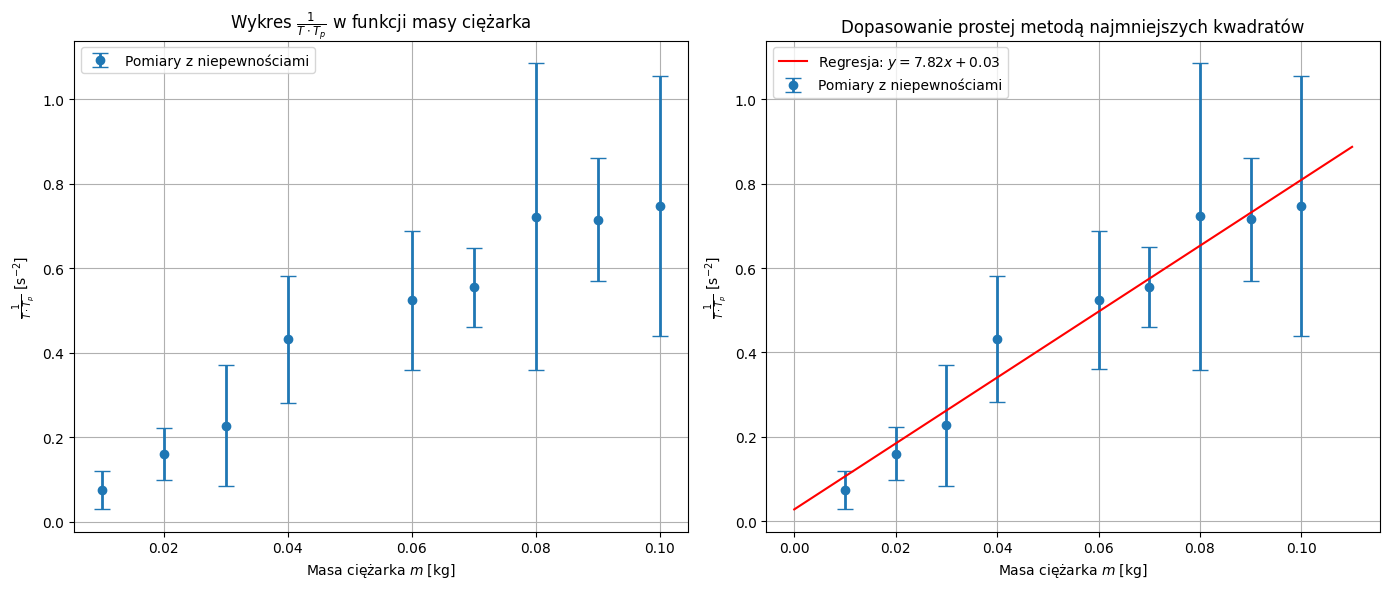

In [9]:
#wykonujemy wykres i regresję liniową dla zależności 1/(T*T_p) od masy ciężarka
a, b = np.polyfit(masses.astype(float), T_T_p_inv.astype(float), 1)
print(f"Współczynniki regresji: a = {a:.2f}, b = {b:.2f}")

#tworzymy wykresy obok siebie
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#wykres 1: surowe dane z niepewnościami
ax1.errorbar(masses, T_T_p_inv, yerr=u_T_T_p_inv, fmt='o', label='Pomiary z niepewnościami', elinewidth=2, capsize=6)
ax1.set_xlabel(r'Masa ciężarka $m$ [kg]')
ax1.set_ylabel(r'$\frac{1}{T \cdot T_p}$ [s$^{-2}$]')
ax1.set_title(r'Wykres $\frac{1}{T \cdot T_p}$ w funkcji masy ciężarka')
ax1.legend(loc='upper left')
ax1.grid()

#wykres 2: dane z regresją liniową
x_plot = np.linspace(0, max(masses) * 1.1, 100)
ax2.errorbar(masses, T_T_p_inv, yerr=u_T_T_p_inv, fmt='o', label='Pomiary z niepewnościami', elinewidth=2, capsize=6)
ax2.plot(x_plot, a * x_plot + b, 'r-', label=f'Regresja: $y = {a:.2f}x + {b:.2f}$')
ax2.set_xlabel(r'Masa ciężarka $m$ [kg]')
ax2.set_ylabel(r'$\frac{1}{T \cdot T_p}$ [s$^{-2}$]')
ax2.set_title(r'Dopasowanie prostej metodą najmniejszych kwadratów')
ax2.legend(loc='upper left')
ax2.grid()

plt.tight_layout()
plt.show()

Współczynnik regresji (przechodzącej przez początek): a = 8.20


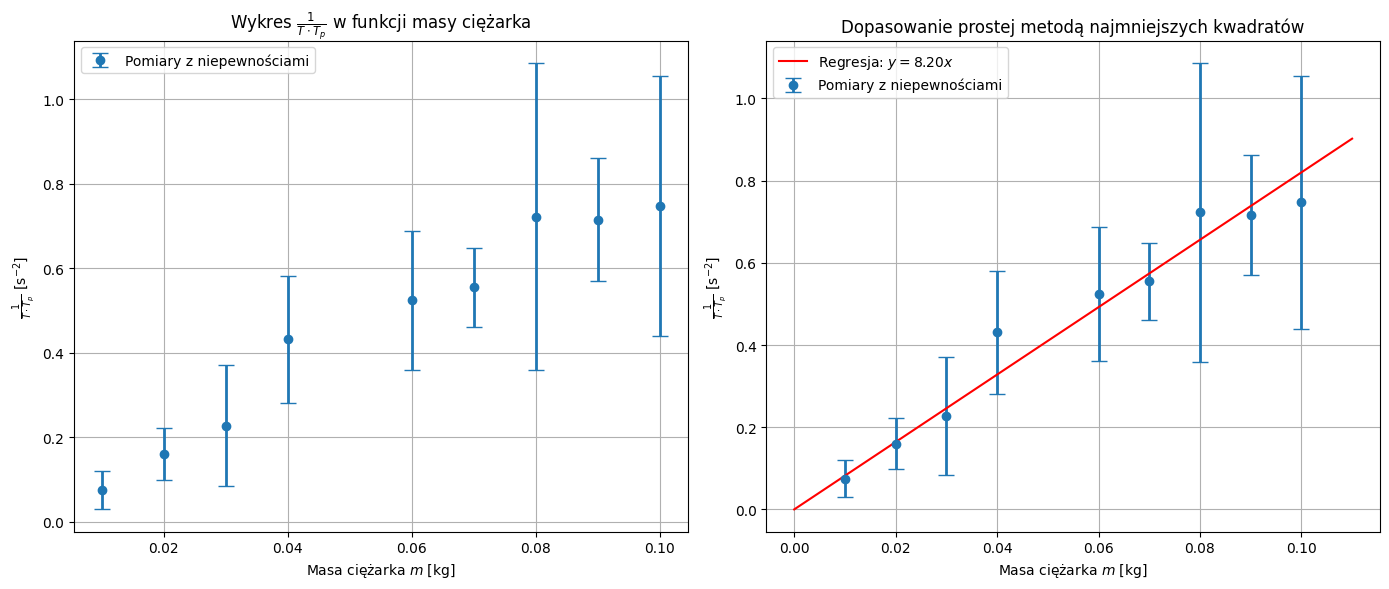

In [10]:
#analogiczną regresję można wykonać przy założeniu, że prosta przechodzi przez początek układu współrzędnych

#model y = ax. Metoda najmniejszych kwadratów: a = sum(x*y) / sum(x^2)
x = masses.astype(float)
y = T_T_p_inv.astype(float)
a_fixed_all_masses = np.sum(x * y) / np.sum(x**2)

print(f"Współczynnik regresji (przechodzącej przez początek): a = {a_fixed_all_masses:.2f}")

#tworzymy wykresy obok siebie
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#wykres 1: surowe dane z niepewnościami
ax1.errorbar(masses, T_T_p_inv, yerr=u_T_T_p_inv, fmt='o', label='Pomiary z niepewnościami', elinewidth=2, capsize=6)
ax1.set_xlabel(r'Masa ciężarka $m$ [kg]')
ax1.set_ylabel(r'$\frac{1}{T \cdot T_p}$ [s$^{-2}$]')
ax1.set_title(r'Wykres $\frac{1}{T \cdot T_p}$ w funkcji masy ciężarka')
ax1.legend(loc='upper left')
ax1.grid()

#wykres 2: dane z regresją liniową
x_plot = np.linspace(0, max(masses) * 1.1, 100)
ax2.errorbar(masses, T_T_p_inv, yerr=u_T_T_p_inv, fmt='o', label='Pomiary z niepewnościami', elinewidth=2, capsize=6)
ax2.plot(x_plot, a_fixed_all_masses * x_plot, 'r-', label=f'Regresja: $y = {a_fixed_all_masses:.2f}x$')
ax2.set_xlabel(r'Masa ciężarka $m$ [kg]')
ax2.set_ylabel(r'$\frac{1}{T \cdot T_p}$ [s$^{-2}$]')
ax2.set_title(r'Dopasowanie prostej metodą najmniejszych kwadratów')
ax2.legend(loc='upper left')
ax2.grid()

plt.tight_layout()
plt.show()

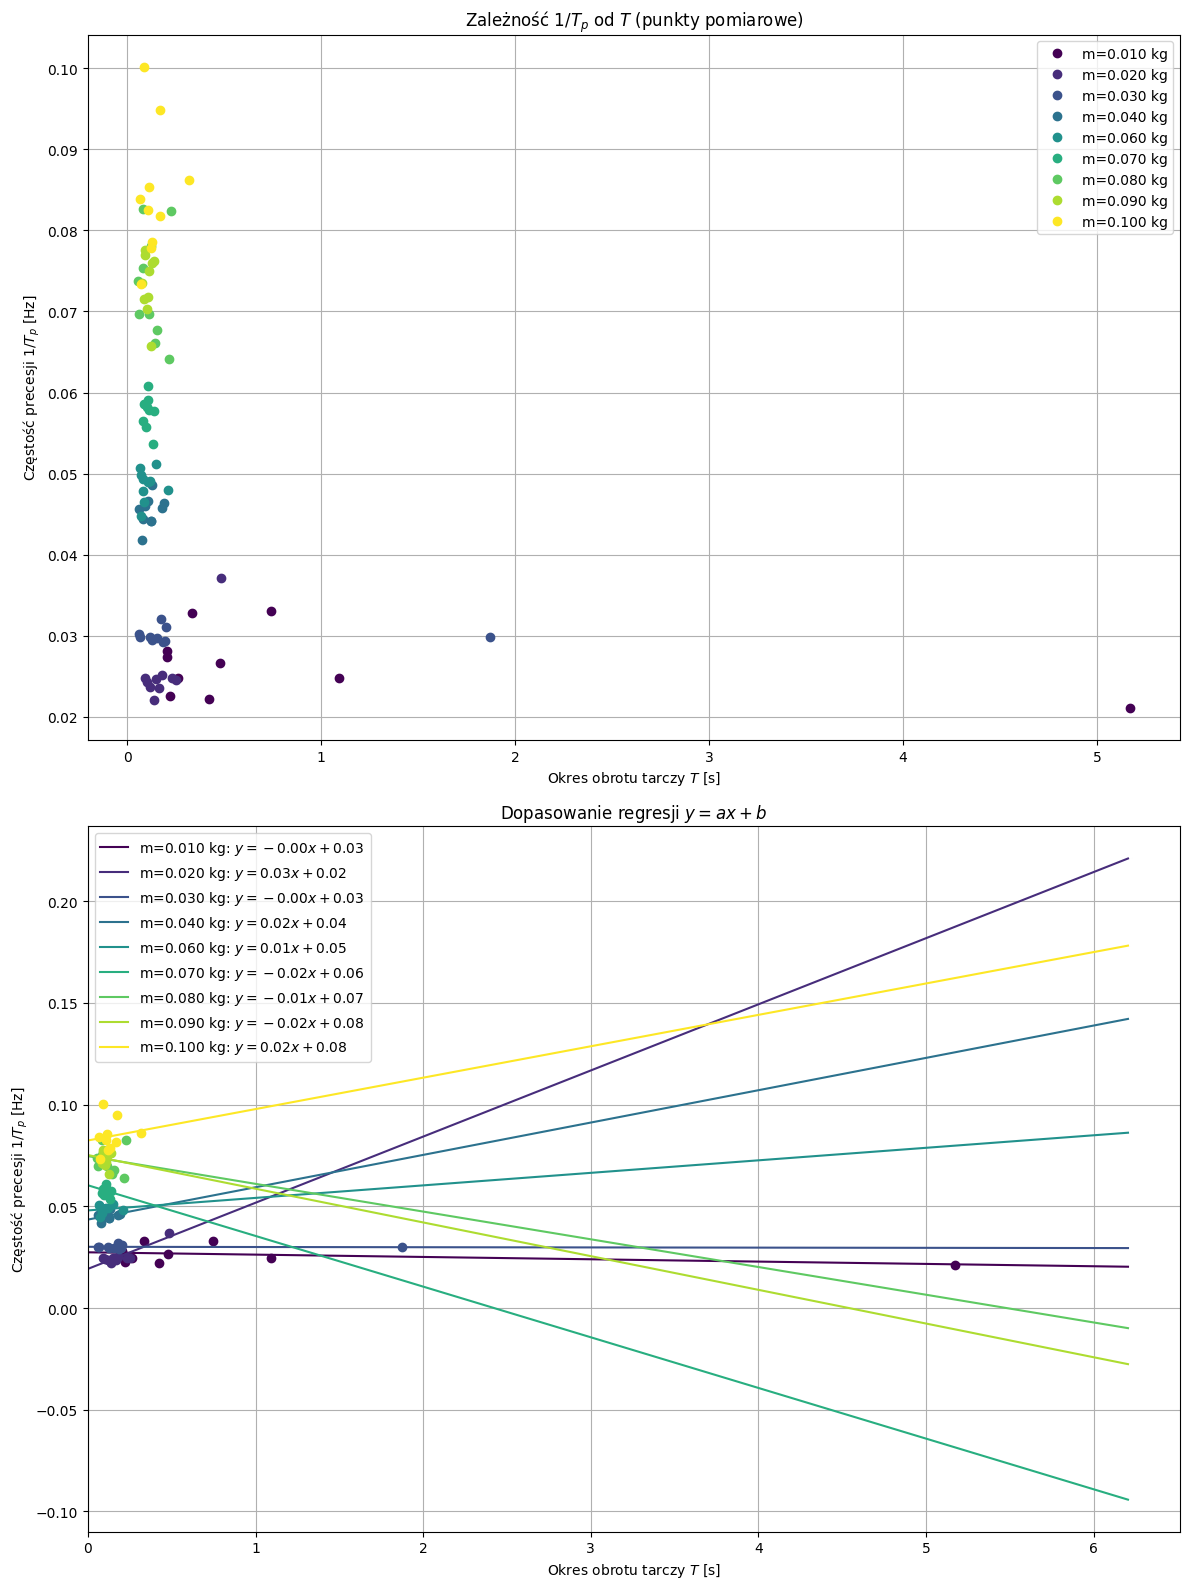

In [11]:
#teraz wykonamy wykres i regresję dla zależności 1/T_p od T grupując pomiary po masach ciężarków

#obliczamy odwrotność okresu precesji
precession_time['inv_Tp'] = 1 / precession_time['T_p']

#przygotowanie kolorów dla różnych mas
colors = plt.cm.viridis(np.linspace(0, 1, len(masses)))
max_T = precession_time['T'].max()

#wykres dla regresji y = ax + b
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

for m, color in zip(masses, colors):
    subset = precession_time[precession_time['m'] == m]
    x = subset['T']
    y = subset['inv_Tp']
    
    #wykres 1: Punkty pomiarowe
    ax1.plot(x, y, 'o', color=color, label=f'm={m:.3f} kg')
    
    #regresja y = ax + b
    a, b = np.polyfit(x, y, 1)
    
    #wykres 2: Punkty + Regresja
    ax2.plot(x, y, 'o', color=color)
    x_plot = np.linspace(0, max_T * 1.2, 100)
    ax2.plot(x_plot, a * x_plot + b, '-', color=color, label=f'm={m:.3f} kg: $y={a:.2f}x{b:+.2f}$')

ax1.set_xlabel(r'Okres obrotu tarczy $T$ [s]')
ax1.set_ylabel(r'Częstość precesji $1/T_p$ [Hz]')
ax1.set_title(r'Zależność $1/T_p$ od $T$ (punkty pomiarowe)')
ax1.legend()
ax1.grid()

ax2.set_xlabel(r'Okres obrotu tarczy $T$ [s]')
ax2.set_ylabel(r'Częstość precesji $1/T_p$ [Hz]')
ax2.set_title(r'Dopasowanie regresji $y=ax+b$')
ax2.legend()
ax2.grid()
ax2.set_xlim(left=0)

plt.tight_layout()
plt.show()

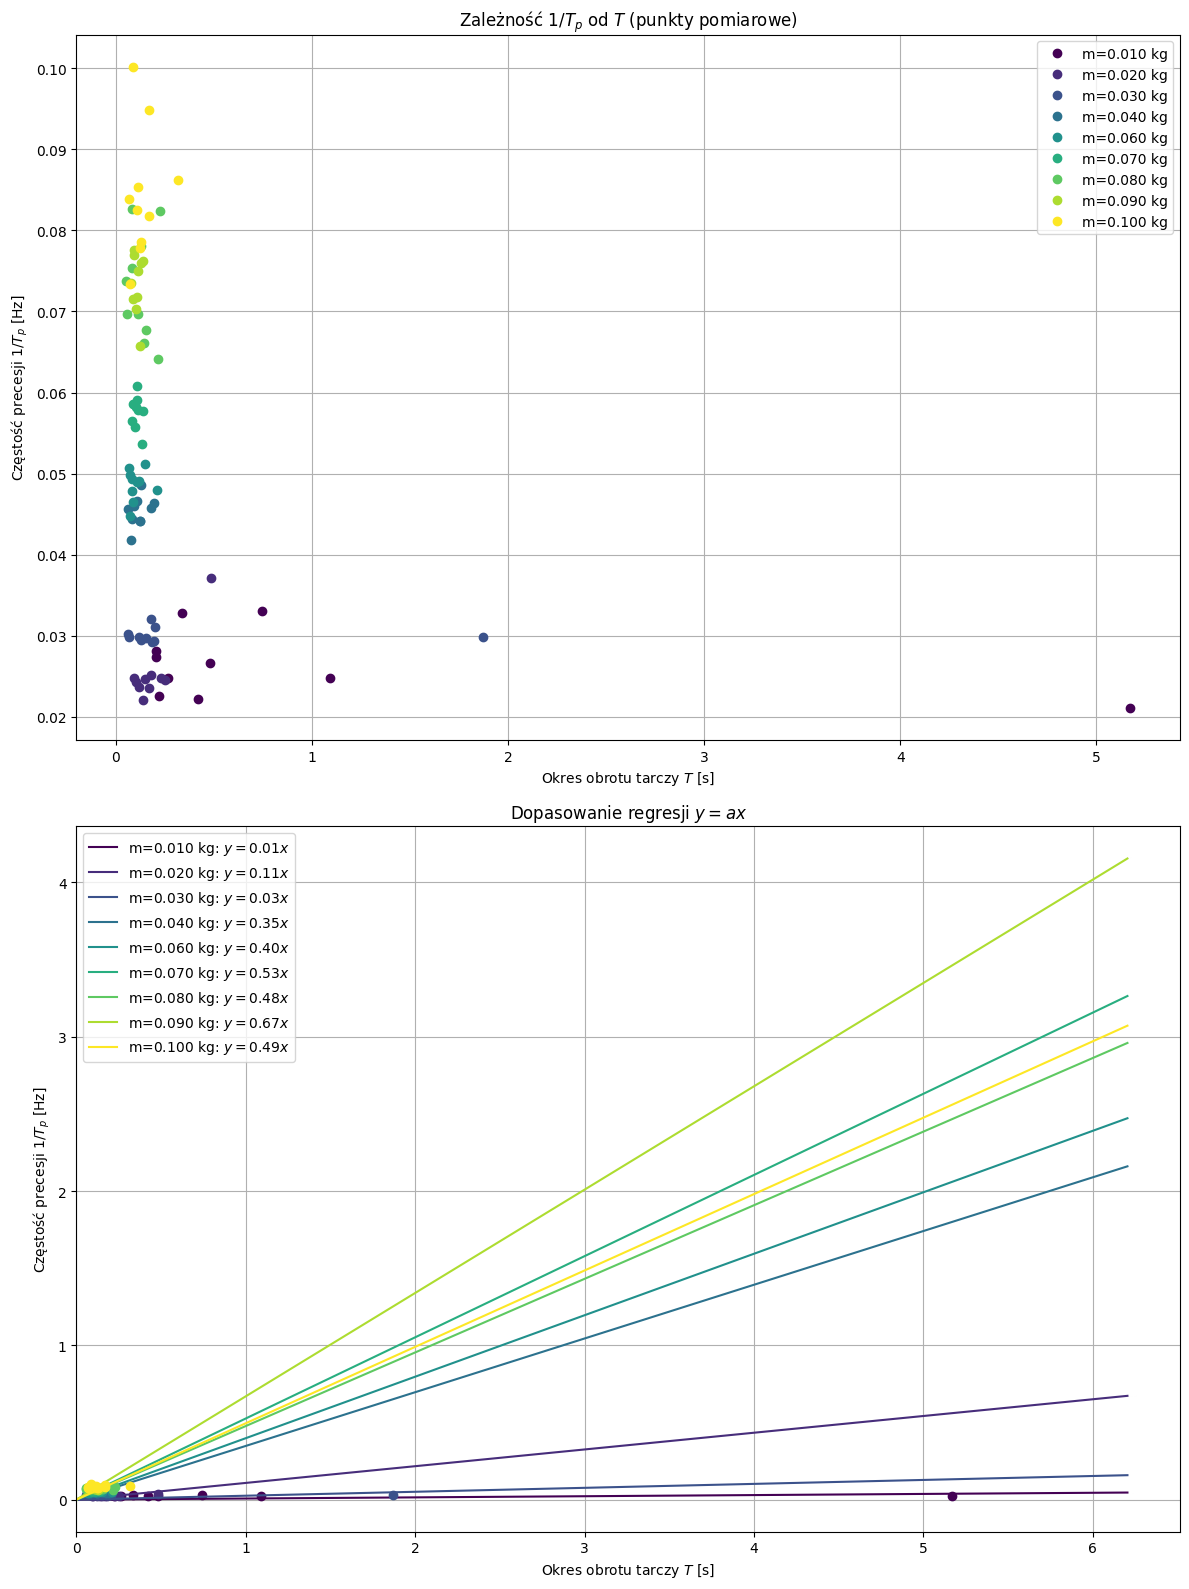

In [12]:
#wykres dla regresji y = ax (przechodzącej przez 0)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
max_T = precession_time['T'].max()

a_fixed_by_mass = {}

for m, color in zip(masses, colors):
    subset = precession_time[precession_time['m'] == m]
    x = subset['T']
    y = subset['inv_Tp']
    
    #wykres 1: Punkty pomiarowe
    ax1.plot(x, y, 'o', color=color, label=f'm={m:.3f} kg')
    
    #regresja y = ax
    #metoda najmniejszych kwadratów dla y=ax: a = sum(x*y) / sum(x^2)
    a_fixed_by_mass[m] = np.sum(x * y) / np.sum(x**2)
    
    #wykres 2: Punkty + Regresja
    ax2.plot(x, y, 'o', color=color)
    x_plot = np.linspace(0, max_T * 1.2, 100)
    ax2.plot(x_plot, a_fixed_by_mass[m] * x_plot, '-', color=color, label=f'm={m:.3f} kg: $y={a_fixed_by_mass[m]:.2f}x$')

ax1.set_xlabel(r'Okres obrotu tarczy $T$ [s]')
ax1.set_ylabel(r'Częstość precesji $1/T_p$ [Hz]')
ax1.set_title(r'Zależność $1/T_p$ od $T$ (punkty pomiarowe)')
ax1.legend()
ax1.grid()

ax2.set_xlabel(r'Okres obrotu tarczy $T$ [s]')
ax2.set_ylabel(r'Częstość precesji $1/T_p$ [Hz]')
ax2.set_title(r'Dopasowanie regresji $y=ax$')
ax2.legend()
ax2.grid()
ax2.set_xlim(left=0)

plt.tight_layout()
plt.show()

### 6. Obliczanie momentów bezwładności różnymi sposobami

In [13]:
#aby policzyć numeryczny moment bezwładności tą metodą musimy ustalić stałe:
g = 9.81
pi = 3.41

#ustawianie masy tarczy w kg
M_t = 1.290

#obliczamy promień tarczy
r = D / 2
u_r = u_D / 2
print(f"Promień tarczy: {r:.3f} m ± {u_r:.3f} m")

Promień tarczy: 0.130 m ± 0.005 m


#### Obliczanie momentu bezwładności przy założeniu, że tarcza jest idealnym dyskiem matematycznym

In [14]:
#wyznaczenie momentu bezwładności tarczy metodą geometryczną
J_geom = (1/2) * M_t * r**2

#obliczanie niepewności metodą różniczki zupełnej
#zakładamy, że M_t jest stałą, więc liczymy pochodną cząstkową tylko po D
#J = (1/2) * M_t * D^2
#|dJ/dD| = M_t * D
u_J_geom = ((M_t * r * u_r) ** 2) ** 0.5

print(f"Moment bezwładności (geometryczny): {J_geom:.6f} kg*m^2")
print(f"Niepewność (geometryczna): {u_J_geom:.6f} kg*m^2")

Moment bezwładności (geometryczny): 0.010867 kg*m^2
Niepewność (geometryczna): 0.000826 kg*m^2


#### Obliczanie momentu bezwładności korzystając z policzonej regresji $\frac{1}{T T_p} = a \cdot m$, gdzie $a$ jest współczynnikiem regresji przechowywanej w zmiennej a_fixed_all_masses

Przekształcamy tutaj wzór podany wyżej:
$$mgr = \frac{J \cdot 4\pi^2}{T \cdot T_p} \;\Big|_{\cdot T T_p}$$
$$mgr T T_p = J \cdot 4\pi^2 \;\Big|_{\cdot \frac{1}{4\pi^2}}$$
$$J = \frac{mgr T T_p}{4\pi^2} $$
$$J = \frac{mgr}{4\pi^2 \cdot \frac{1}{T T_p}} $$
Korzystamy tutaj z regresji liniowej $\frac{1}{T T_p} = a \cdot m$
$$J = \frac{\cancel{m}gr}{4\pi^2 \cdot a \cdot \cancel{m}} $$
$$J = \frac{gr}{4\pi^2 \cdot a} $$

In [15]:
J_dyn_all_masses = (g * r) / (4 * (pi ** 2) * a_fixed_all_masses)
#do policzenia niepewności skorzystamy z tego, że uznajemy g, pi oraz a za stałe bez niepewności
u_J_dyn_all_masses = (g * u_r) / (4 * (pi ** 2) * a_fixed_all_masses)

print(f"Moment bezwładności (dynamiczny): {J_dyn_all_masses:.6f} kg*m^2")
print(f"Niepewność (dynamiczna): {u_J_geom:.6f} kg*m^2")

Moment bezwładności (dynamiczny): 0.003338 kg*m^2
Niepewność (dynamiczna): 0.000826 kg*m^2


#### Obliczanie momentu bezwładności korzystając z policzonych regresji $\frac{1}{T_p} = a \cdot T$ dla ustalonej masy $m$, gdzie $a$ jest współczynnikiem regresji przechowywanym wraz z masami w słowniku a_fixed_by_mass

Przekształcamy tutaj wzór podany wyżej:
$$mgr = \frac{J \cdot 4\pi^2}{T \cdot T_p} \;\Big|_{\cdot T T_p}$$
$$mgr T T_p = J \cdot 4\pi^2 \;\Big|_{\cdot \frac{1}{4\pi^2}}$$
$$J = \frac{mgr T T_p}{4\pi^2} $$
$$J = \frac{mgr}{4\pi^2 \cdot \frac{1}{T T_p}} $$
Korzystamy tutaj z regresji liniowej $\frac{1}{T_p} = a \cdot T$
$$J = \frac{mgr}{4\pi^2 \cdot \frac{a \cdot \cancel{T}}{\cancel{T}}} $$
$$J = \frac{mgr}{4\pi^2 \cdot a} $$

In [16]:
#obliczanie momentu bezwładności metodą dynamiczną dla każdej masy osobno
results = {}
for m in masses:
    a_fixed = a_fixed_by_mass[m]
    J_dyn = (m * g * r) / (4 * (pi ** 2) * a_fixed)
    #do policzenia niepewności skorzystamy z tego, że uznajemy g, pi oraz a za stałe bez niepewności
    u_J_dyn = (m * g * u_r) / (4 * (pi ** 2) * a_fixed)
    results[m] = (J_dyn, u_J_dyn)
    print(f"Dla masy {m:.3f} kg: Moment bezwładności (dynamiczny): {J_dyn:.6f} kg*m^2 ± {u_J_dyn:.6f} kg*m^2")

Dla masy 0.010 kg: Moment bezwładności (dynamiczny): 0.036856 kg*m^2 ± 0.001400 kg*m^2
Dla masy 0.020 kg: Moment bezwładności (dynamiczny): 0.005050 kg*m^2 ± 0.000192 kg*m^2
Dla masy 0.030 kg: Moment bezwładności (dynamiczny): 0.032134 kg*m^2 ± 0.001221 kg*m^2
Dla masy 0.040 kg: Moment bezwładności (dynamiczny): 0.003146 kg*m^2 ± 0.000120 kg*m^2
Dla masy 0.060 kg: Moment bezwładności (dynamiczny): 0.004124 kg*m^2 ± 0.000157 kg*m^2
Dla masy 0.070 kg: Moment bezwładności (dynamiczny): 0.003644 kg*m^2 ± 0.000138 kg*m^2
Dla masy 0.080 kg: Moment bezwładności (dynamiczny): 0.004592 kg*m^2 ± 0.000174 kg*m^2
Dla masy 0.090 kg: Moment bezwładności (dynamiczny): 0.003680 kg*m^2 ± 0.000140 kg*m^2
Dla masy 0.100 kg: Moment bezwładności (dynamiczny): 0.005531 kg*m^2 ± 0.000210 kg*m^2


In [17]:
#finalnie możemy przedstawić podsumowanie wyników (momenty bezwładności wraz z niepewnościami względnymi i bezwzględnymi) w formie tabeli dla metody geometrycznej oraz dynamicznej dla każdej masy osobno
summary_data = {
    'Metoda': [],
    'Masa ciężarka (kg)': [],
    'Moment bezwładności (kg*m^2)': [],
    'Niepewność (kg*m^2)': [],
    'Niepewność względna (%)': []
}

#dodajemy wynik geometryczny
summary_data['Metoda'].append('Geom.')
summary_data['Masa ciężarka (kg)'].append('N/A')
summary_data['Moment bezwładności (kg*m^2)'].append(J_geom)
summary_data['Niepewność (kg*m^2)'].append(u_J_geom)
summary_data['Niepewność względna (%)'].append((u_J_geom / J_geom) * 100)

#dodajemy wynik dynamiczny dla całego zbioru danych
summary_data['Metoda'].append('Dyn. (wszystkie masy)')
summary_data['Masa ciężarka (kg)'].append('N/A')
summary_data['Moment bezwładności (kg*m^2)'].append(J_dyn_all_masses)
summary_data['Niepewność (kg*m^2)'].append(u_J_dyn_all_masses)
summary_data['Niepewność względna (%)'].append((u_J_dyn_all_masses / J_dyn_all_masses) * 100)

#dodajemy wyniki dynamiczne dla każdej masy
for m in masses:
    J_dyn, u_J_dyn = results[m]
    summary_data['Metoda'].append('Dyn.')
    summary_data['Masa ciężarka (kg)'].append(m)
    summary_data['Moment bezwładności (kg*m^2)'].append(J_dyn)
    summary_data['Niepewność (kg*m^2)'].append(u_J_dyn)
    summary_data['Niepewność względna (%)'].append((u_J_dyn / J_dyn) * 100)

summary_df = pd.DataFrame(summary_data)
print("\nPodsumowanie wyników momentu bezwładności:")


summary_df.head(len(summary_df))


Podsumowanie wyników momentu bezwładności:


,Metoda,Masa ciężarka (kg),Moment bezwładności (kg*m^2),Niepewność (kg*m^2),Niepewność względna (%)
0,Geom.,N/A,0.010867,0.000826,7.599442
1,Dyn. (wszystkie masy),N/A,0.003338,0.000127,3.799721
2,Dyn.,0.01,0.036856,0.001400,3.799721
3,Dyn.,0.02,0.005050,0.000192,3.799721
4,Dyn.,0.03,0.032134,0.001221,3.799721
5,Dyn.,0.04,0.003146,0.000120,3.799721
6,Dyn.,0.06,0.004124,0.000157,3.799721
7,Dyn.,0.07,0.003644,0.000138,3.799721
8,Dyn.,0.08,0.004592,0.000174,3.799721
9,Dyn.,0.09,0.003680,0.000140,3.799721


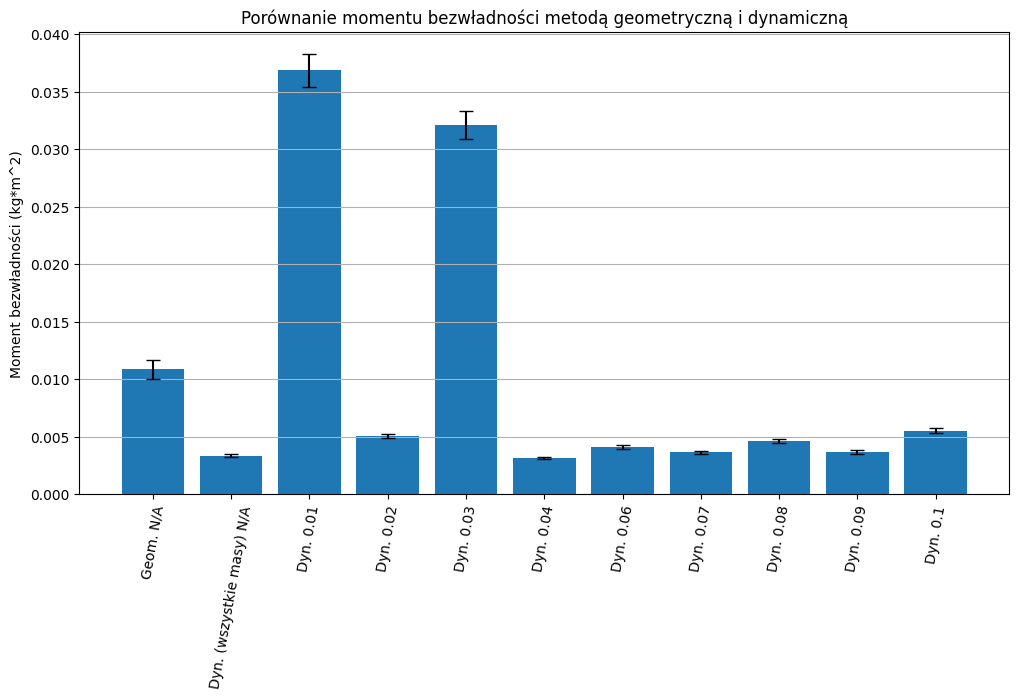

In [18]:
#przedstawiamy również te dane w formie wykresu słupkowego z niepewnościami
plt.figure(figsize=(12, 6))
bars = plt.bar(summary_df.index, summary_df['Moment bezwładności (kg*m^2)'], yerr=summary_df['Niepewność (kg*m^2)'], capsize=5)
plt.xticks(summary_df.index, summary_df['Metoda'] + ' ' + summary_df['Masa ciężarka (kg)'].astype(str), rotation=80)
plt.ylabel('Moment bezwładności (kg*m^2)')
plt.title('Porównanie momentu bezwładności metodą geometryczną i dynamiczną')
plt.grid(axis='y')
plt.show()

### 7. Interpretacja otrzymanych wyników

Jak można zauważyć na wykresie słupkowym model geometryczny oraz modele dynamiczne dla mas 10g i 30g stanowczo odbiegają od reszty zarówno w kwestii wartości jak i dużo większego błędu. Co do modelów dynamicznych dla mas 10g i 30g powodem takich rozbieżności może być dużo większy błąd względny wyrażenia $\frac{1}{T T_p}$, które dla mas 10g i 30g wynoszą około 60%, a dla pozostałych mas wynoszą około 30-40%. Oprócz tego wyniki te pokazują, że model geometryczny mógł nie być odpowiedni dla tego dysku, na przykład ze względu na inny kształt który większą częśc masy skupiał dalej od osi obrotu.